# Importing Libraries and Datasets

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
data.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### Computing a summary of statistics pertaining to the DataFrame columns

In [7]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


#### Identifying the unique value's in the data

In [39]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

To identify duplicate value's in the data

In [49]:
udata.duplicated().sum()

0

In [ ]:
data['gender'].unique()

##### Deleting the unneccesary columns in the data

In [60]:
udata=data.drop(["currency","merchant_code","country","bpay_biller_code"],axis=1)

In [61]:
udata.shape

(12043, 19)

In [62]:
udata.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

In [64]:
avg_trns_amnt=udata[['amount']].mean(axis=0)
print(avg_trns_amnt)

amount    187.933588
dtype: float64


In [65]:
#Replacing the missing value with mode (Categorical Data)
udata['card_present_flag'].fillna((udata['card_present_flag'].mode().values[0]), inplace=True)

In [66]:
udata.isnull().sum()

status                  0
card_present_flag       0
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [142]:
maxx=udata["date"].value_counts()
print("Days in which maximum transaction recorded")
print(maxx.head(10))
print("Days in which manimum transaction recorded")
print(maxx.tail(10))

Days in which maximum transaction recorded
2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
2018-09-21    160
2018-10-03    160
2018-10-04    159
2018-09-27    159
2018-10-19    158
Name: date, dtype: int64
Days in which manimum transaction recorded
2018-09-10    103
2018-10-29    102
2018-10-16    102
2018-09-24    101
2018-08-05    100
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, dtype: int64


In [146]:
maxm=udata["customer_id"].value_counts()
print("Top 10 customer's who had done a maximum transaction in 3 month's")
maxm.head(10)
print("Bottom 10 customer's who had done a minimum transaction in 3 month's")
maxm.tail(10)

Top 10 customer's who had done a maximum transaction in 3 month's
Bottom 10 customer's who had done a minimum transaction in 3 month's


CUS-3174332735    51
CUS-3151318058    49
CUS-326006476     47
CUS-1233833708    44
CUS-2977593493    44
CUS-3395687666    40
CUS-3201519139    37
CUS-1646183815    34
CUS-495599312     31
CUS-1739931018    25
Name: customer_id, dtype: int64

##### Pictorial representation of customer transaction in 3 months

In [117]:
date_mean = udata.groupby("date")["amount"].mean().reset_index()

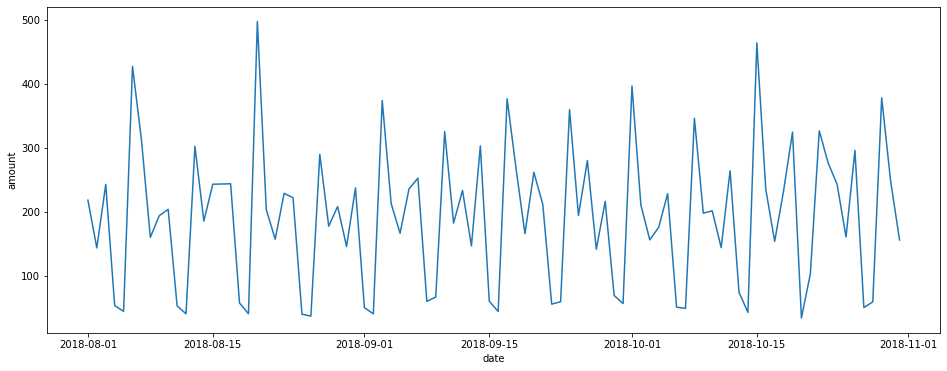

In [121]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",estimator="mean",data=date_mean)

###### Visualising the Male Vs Female - Spending Habits

In [122]:
gender_mean = udata.groupby(["date","gender"])["amount"].mean().reset_index()
gender_mean.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


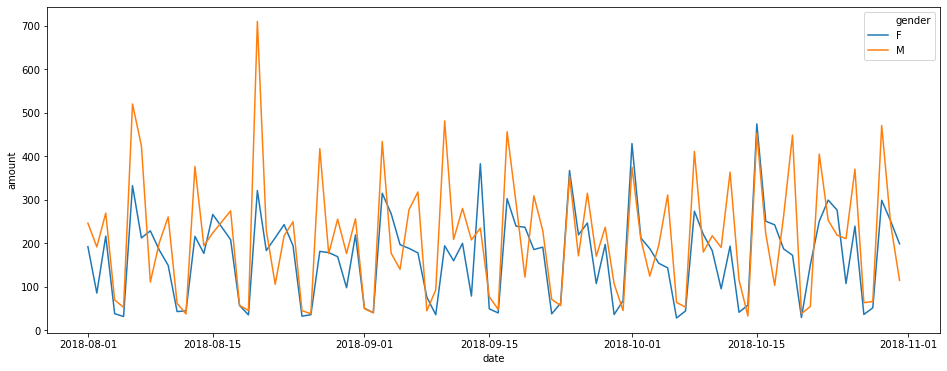

In [123]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=gender_mean)

Transaction are done in different states of Australia

In [124]:
merchant_state_total = data.groupby(["merchant_state","gender"])["amount"].sum().reset_index()
merchant_state_total

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42
5,NT,M,427.47
6,QLD,F,28611.05
7,QLD,M,24872.40
8,SA,F,11349.73
9,SA,M,5426.84


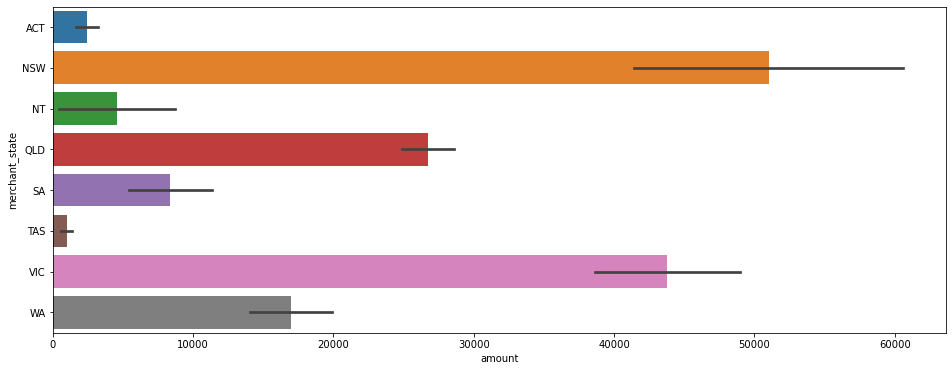

In [125]:
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state",  data=merchant_state_total)

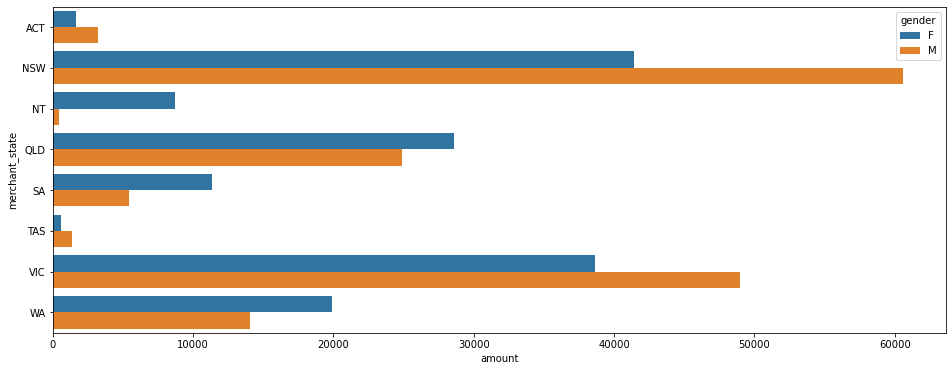

In [126]:
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state", hue="gender", data=merchant_state_total)

###### Genderwise usage statistics of debit and credit card  

In [127]:
debit_credit= data.groupby(["movement","gender"])["amount"].mean().reset_index()
debit_credit

,movement,gender,amount
0,credit,F,1679.370477
1,credit,M,2096.811681
2,debit,F,49.946881
3,debit,M,54.980407


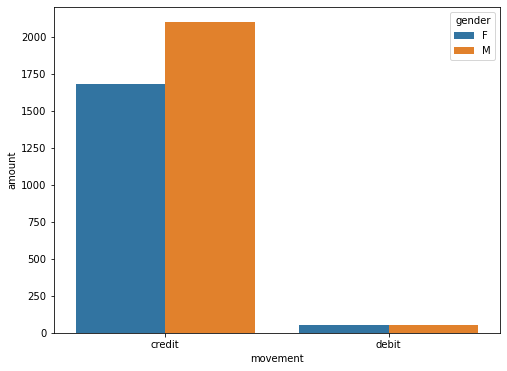

In [128]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit)

Maximum transaction in different suburb areas of Australia

In [131]:
merchant_suburb_mean= data.groupby(["merchant_suburb"])["amount"].mean().reset_index()
merchant_suburb_mean.head(5)

,merchant_suburb,amount
0,Abbotsford,400.858
1,Aberdeen,26.225
2,Aberfeldie,57.770
3,Aberfoyle Park,42.460
4,Acacia Ridge,10.300


In [134]:
suburb_sorted_mean=merchant_suburb_mean.sort_values(by='amount', ascending=False)
print("Top 10 regions with most mean value of transactions over 91 days are-")
print(suburb_sorted_mean.head(10).values)

Top 10 regions with most mean value of transactions over 91 days are-
[['Pantapin' 829.7650000000001]
 ['Gladesville' 734.1]
 ['West Wodonga' 559.33]
 ['South Brisbane' 559.0752380952381]
 ['Parap' 553.9183333333334]
 ['Lowlands' 524.58]
 ['Mossman Gorge' 501.67]
 ['Fairlight' 496.76]
 ['Deakin' 491.5066666666667]
 ['Mount Gravatt' 453.5233333333333]]
